# Import the library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn  as sns
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.model_selection import train_test_split
import category_encoders as ce




import warnings 
warnings.filterwarnings("ignore")

# Data Understanding and Cleaning


* Load the dataset

In [2]:
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

* Explore the Data:



In [3]:
print("Show the first 20 rows in dataset train ")
df_train.head(20)


Show the first 20 rows in dataset train 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
print("Display Columns")
df_train.columns

Display Columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
print(df_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


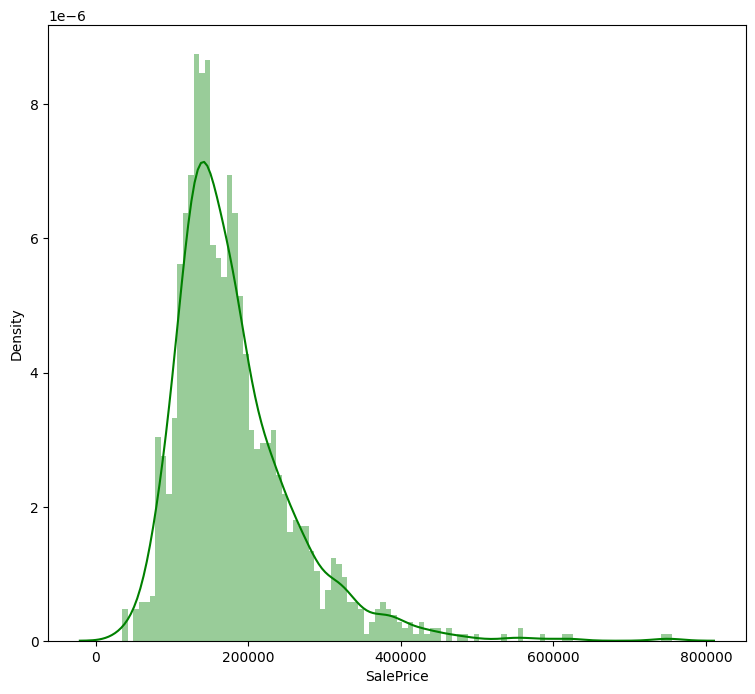

In [7]:
plt.figure(figsize=(9, 8))
sns.distplot(df_train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

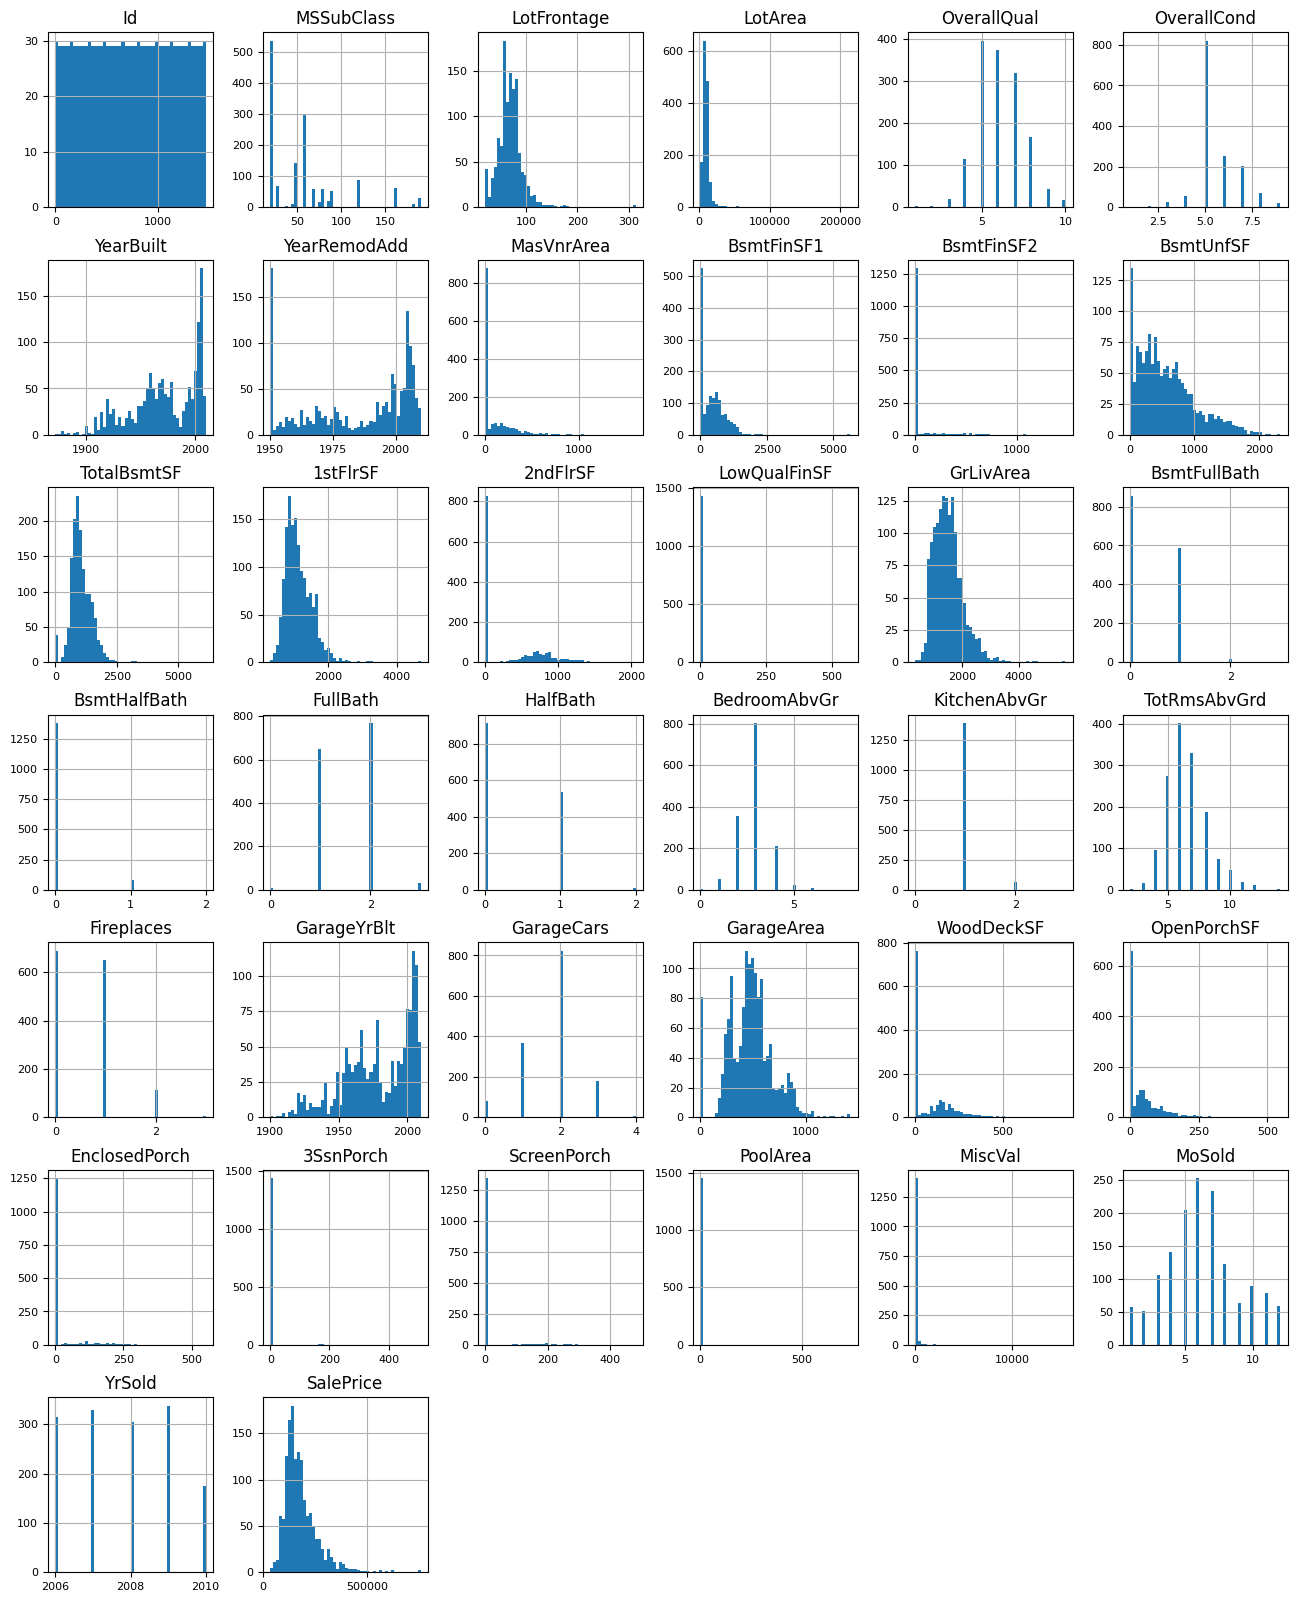

In [8]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [9]:
X = df_train.drop("SalePrice", axis=1)

y = df_train.SalePrice

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle Missing Values



In [10]:
X_train = X_train.drop("Id" , axis=1)
X_valid = X_valid.drop("Id" , axis=1)
df_test = df_test.drop("Id" , axis=1)


- Visualization of Missing Values

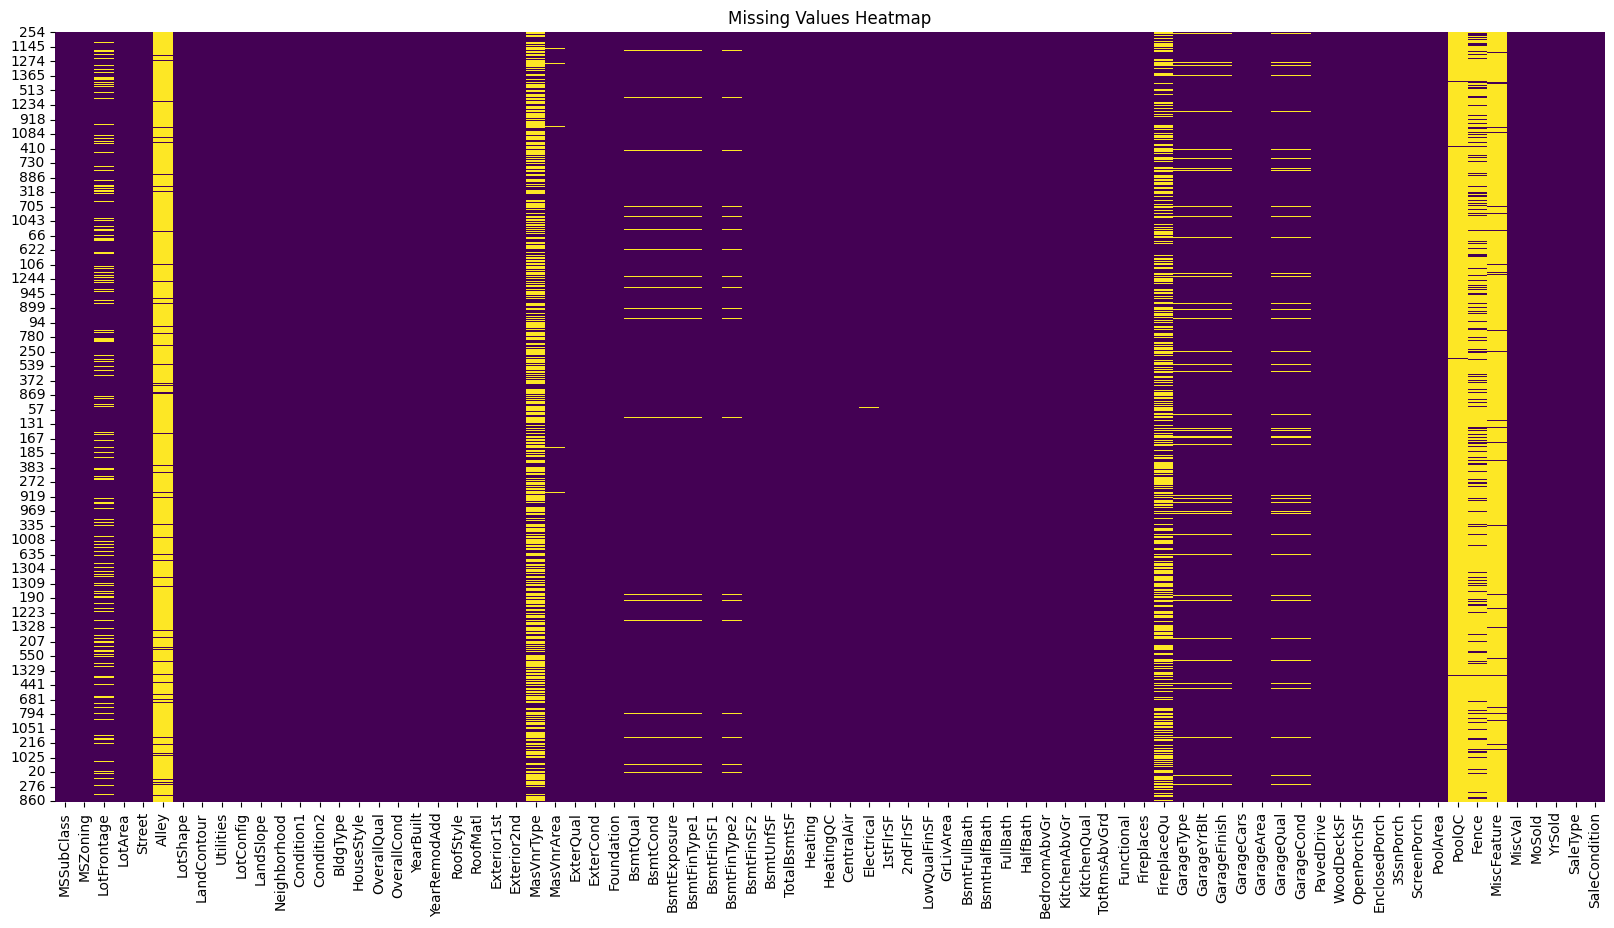

In [11]:
plt.figure(figsize=(20 ,10))
sns.heatmap(X_train.isnull() , cbar=False , cmap="viridis")

plt.title("Missing Values Heatmap")
plt.show()

* Fortunately for us, in this data set, the features that contain nal indicate that these features are not available to all homes, meaning that there is no error in the data, and there is no error in recording the data at all.

In [12]:
# fillna zeros for all nulls
for i in X_train.columns:
    X_train[i] = X_train[i].fillna(0)
    X_valid[i] = X_valid[i].fillna(0)
    df_test[i] = df_test[i].fillna(0)

# Handing Duplicates

In [13]:
# Removing duplicates from X_train
X_train = X_train.drop_duplicates()

# Removing duplicates from X_valid
X_valid = X_valid.drop_duplicates()

# Removing duplicates from df_test
df_test = df_test.drop_duplicates()


# Dealing with Outliers

In [14]:
def CapOutliers(df):
    # Create a copy of the DataFrame to avoid modifying the original 
    df_capped = df.copy()

    # Iterate through each numerical column 
    for col in df_capped.select_dtypes(include=["object"]):
        q1 = df_capped[col].quantile(25)
        q3 = df_capped[col].quantile(75)
        iqr = q3 - q1 
        upper_bound = q3 + 1.5 * iqr

        # Clip outliers 
        df_capped[col] = df_capped.clip(upper=upper_bound)

    return df_capped

In [15]:
XTrain = CapOutliers(X_train.select_dtypes(include=["int64","float64"]))
XValid = CapOutliers(X_valid.select_dtypes(include=["int64","float64"]))
DfTest = CapOutliers(df_test.select_dtypes(include=["int64","float64"]))

In [16]:
NumberData = pd.concat([XTrain , XValid , DfTest], axis= 0 ,ignore_index=True)

In [17]:
NumberData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   LotFrontage    2919 non-null   float64
 2   LotArea        2919 non-null   int64  
 3   OverallQual    2919 non-null   int64  
 4   OverallCond    2919 non-null   int64  
 5   YearBuilt      2919 non-null   int64  
 6   YearRemodAdd   2919 non-null   int64  
 7   MasVnrArea     2919 non-null   float64
 8   BsmtFinSF1     2919 non-null   float64
 9   BsmtFinSF2     2919 non-null   float64
 10  BsmtUnfSF      2919 non-null   float64
 11  TotalBsmtSF    2919 non-null   float64
 12  1stFlrSF       2919 non-null   int64  
 13  2ndFlrSF       2919 non-null   int64  
 14  LowQualFinSF   2919 non-null   int64  
 15  GrLivArea      2919 non-null   int64  
 16  BsmtFullBath   2919 non-null   float64
 17  BsmtHalfBath   2919 non-null   float64
 18  FullBath

# Encoding Categorical Variables 
* Count Encoding


In [18]:
def just_object(df):
    # Get a DataFrame containing only int and float columns
    numeric_columns = df.select_dtypes(include=['int', 'float'])
    
    # Drop the numeric columns from the original DataFrame
    df = df.drop(columns=numeric_columns.columns)
    return df

In [19]:
XTraine = just_object(X_train)
XValide = just_object(X_valid)
DfTeste = just_object(df_test)

In [20]:
XTraine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1168 non-null   object
 1   Street         1168 non-null   object
 2   Alley          1168 non-null   object
 3   LotShape       1168 non-null   object
 4   LandContour    1168 non-null   object
 5   Utilities      1168 non-null   object
 6   LotConfig      1168 non-null   object
 7   LandSlope      1168 non-null   object
 8   Neighborhood   1168 non-null   object
 9   Condition1     1168 non-null   object
 10  Condition2     1168 non-null   object
 11  BldgType       1168 non-null   object
 12  HouseStyle     1168 non-null   object
 13  RoofStyle      1168 non-null   object
 14  RoofMatl       1168 non-null   object
 15  Exterior1st    1168 non-null   object
 16  Exterior2nd    1168 non-null   object
 17  MasVnrType     1168 non-null   object
 18  ExterQual      1168 non-null   

In [21]:
# Combine Three Datasets into One:
cobined_data = pd.concat([XTraine , XValide , DfTeste], axis= 0 ,ignore_index=True)

In [22]:
cobined_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
1,RL,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
2,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,...,0,0,0,0,P,0,MnPrv,0,WD,Normal
3,RL,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,...,Detchd,Unf,TA,TA,Y,0,MnPrv,0,WD,Normal
4,RL,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,...,Detchd,Unf,TA,TA,Y,0,0,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,Y,0,0,0,WD,Normal
2915,RM,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,0,0,0,WD,Abnorml
2916,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,0,0,0,WD,Abnorml
2917,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0,0,0,0,Y,0,MnPrv,Shed,WD,Normal


In [23]:
# Categorical columns 
categorical_columns = XTraine

# Create an instanve og the CountEncoder 
encoder = ce.CountEncoder(cols=categorical_columns)

# Fit 
cobined_data = encoder.fit_transform(cobined_data)

In [24]:
cobined_data.head(20)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,2265,2907,2721,1859,2622,2916,2133,2778,443,2511,...,1723,811,2604,2654,2641,2909,2348,2814,2525,2402
1,2265,2907,2721,968,2622,2916,2133,2778,165,2511,...,1723,811,2604,2654,2641,2909,2348,2814,2525,2402
2,2265,2907,2721,1859,2622,2916,2133,2778,194,164,...,157,159,159,159,62,2909,329,2814,2525,2402
3,2265,2907,2721,1859,2622,2916,511,2778,48,164,...,779,1230,2604,2654,2641,2909,329,2814,2525,2402
4,2265,2907,78,1859,2622,2916,2133,2778,48,2511,...,779,1230,2604,2654,2641,2909,2348,2814,2525,2402
5,2265,2907,2721,1859,2622,2916,511,2778,267,2511,...,1723,1230,2604,2654,2641,2909,112,2814,2525,190
6,2265,2907,2721,76,2622,2916,2133,2778,165,2511,...,186,719,2604,2654,2641,2909,2348,2814,2525,2402
7,460,2907,2721,1859,2622,2916,2133,2778,93,2511,...,779,1230,2604,2654,216,2909,329,2814,2525,2402
8,2265,2907,2721,968,2622,2916,2133,2778,131,2511,...,1723,719,2604,2654,2641,2909,118,2814,2525,2402
9,2265,2907,2721,1859,2622,2916,2133,2778,182,2511,...,1723,719,2604,2654,2641,2909,2348,2814,239,245


In [25]:
new_dataset = pd.concat([cobined_data , NumberData], axis=1)

In [26]:
new_dataset = pd.DataFrame(new_dataset)
new_dataset

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,2265,2907,2721,1859,2622,2916,2133,2778,443,2511,...,294.0,250,0,0,0,0,0,0,6,2010
1,2265,2907,2721,968,2622,2916,2133,2778,165,2511,...,380.0,0,40,0,0,0,0,0,5,2009
2,2265,2907,2721,1859,2622,2916,2133,2778,194,164,...,0.0,328,0,164,0,0,0,0,5,2008
3,2265,2907,2721,1859,2622,2916,511,2778,48,164,...,240.0,0,0,264,0,0,0,0,6,2007
4,2265,2907,78,1859,2622,2916,2133,2778,48,2511,...,308.0,0,0,242,0,0,0,0,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,460,2907,2721,1859,2622,2916,2133,2778,37,2511,...,0.0,0,0,0,0,0,0,0,6,2006
2915,460,2907,2721,1859,2622,2916,2133,2778,37,2511,...,286.0,0,24,0,0,0,0,0,4,2006
2916,2265,2907,2721,1859,2622,2916,2133,2778,114,2511,...,576.0,474,0,0,0,0,0,0,9,2006
2917,2265,2907,2721,1859,2622,2916,2133,2778,114,2511,...,0.0,80,32,0,0,0,0,700,7,2006


In [27]:
Df_Train = new_dataset[:len(XTrain)]
Df_Valid = new_dataset[len(XTrain):len(XTrain)+len(XValid)]
DF_Test = new_dataset[len(XTrain)+len(XValid):]

# Select Features

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(Df_Train)
V_pca = pca.fit_transform(Df_Valid)
DF_pca = pca.fit_transform(DF_Test)


# Build Modles

In [29]:
modle = LinearRegression()

modle.fit(X_pca,y_train)

LinearRegression()

In [30]:
modle.score(X_pca,y_train)

0.4658672160829507

In [31]:
y_pred = modle.predict(V_pca)

In [32]:
def evaluate_regression(y_true, y_pred):
    metrics = {}

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    metrics['Mean Squared Error (MSE)'] = mse

    rmse = np.sqrt(mse)
    metrics['Root Mean Squared Error (RMSE)'] = rmse

    mae = mean_absolute_error(y_true, y_pred)
    metrics['Mean Absolute Error (MAE)'] = mae

    # R-squared (R2) Score
    r2 = r2_score(y_true, y_pred)
    metrics['R-squared (R2) Score'] = r2

    return metrics

In [33]:
evaluate_regression(y_valid,y_pred)

{'Mean Squared Error (MSE)': 4456763454.576338,
 'Root Mean Squared Error (RMSE)': 66758.99530832034,
 'Mean Absolute Error (MAE)': 45057.14082747994,
 'R-squared (R2) Score': 0.41896037610495196}

In [34]:
submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [35]:
y_test = modle.predict(DF_pca)

In [36]:
submission["SalePrice"] = y_test

In [37]:
submission.to_csv("Sumission.csv", index=False)

In [38]:
submission.shape

(1459, 2)